In [1]:
using Parameters
using Statistics
using Distributions
using Plots
using StatsPlots

# Standard library
using Random

In [2]:
include("src/botmarket.jl")
using .BotMarket

In [3]:
price_expr = :(rand(Truncated(Normal(last_price, last_price/100), 0.01, 400)))
order_expr = :(rand([SellLimitOrder, BuyLimitOrder]))
quantity_expr = :(max_quantity == 0 ? 0 : rand(1:Int(max_quantity)));

In [4]:
n_iters = 300
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]


for n in 1:n_iters
    println("Placing...")
    for inv in inv
        place!(inv, stock)
    end
    println("Clearing...")
    clear!(stock)
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end

Placing...
Clearing...
Initializing settling


MethodError: MethodError: no method matching settle!(::BuyLimitOrder, ::SellLimitOrder; method=:fair)
Closest candidates are:
  settle!(::BuyLimitOrder, ::SellLimitOrder, !Matched::Main.BotMarket.AbstractAsset; method) at /media/mikael/DATA/Projects/thesis/src/market/orders.jl:53
  settle!(!Matched::DoubleAuctionMarket, ::SellLimitOrder) at /media/mikael/DATA/Projects/thesis/src/market/settling.jl:42 got unsupported keyword argument "method"

## Update

In [6]:
n_iters = 500
starting_cash = 3000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95

inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

prices = Array{Float64,1}()
quantities = Array{Int64,1}()
for n in 1:n_iters
    println("Placing...")
    trade_quantity = 0
    for inv in inv
        trade_sets = place_and_clear!(inv, stock)
        trade_quantity += sum(map(x -> x.quantity, trade_sets))
        
    end
    println("Clearing...")
    push!(prices, stock.last_price)
    push!(quantities, trade_quantity)
    #clear!(stock)
   

    if n < n_iters
        cancel!(stock)
    end
end

Placing...

Trade between Player 2 and Player 3: 95.13534481614903 x 8

Trade between Player 12 and Player 7: 94.6536298321822 x 8

Trade between Player 13 and Player 7: 94.6536298321822 x 4

Trade between Player 14 and Player 7: 94.6536298321822 x 1

Trade between Player 14 and Player 3: 94.69611642947336 x 10

Trade between Player 15 and Player 3: 94.69611642947336 x 20

Trade between Player 15 and Player 6: 94.86032635436504 x 7

Trade between Player 17 and Player 6: 94.86032635436504 x 3

Trade between Player 1 and Player 18: 94.52862870965505 x 5

Trade between Player 5 and Player 18: 94.50234366668187 x 26

Trade between Player 5 and Player 20: 94.50234366668187 x 2

Trade between Player 19 and Player 20: 94.39268049485027 x 8

Trade between Player 19 and Player 24: 94.39268049485027 x 15

Trade between Player 25 and Player 24: 94.10411912004994 x 13

Trade between Player 25 and Player 26: 94.25455963523237 x 18

Trade between Player 27 and Player 21: 94.6306774130859 x 7

Trade 


Trade between Player 87 and Player 82: 89.6168272802965 x 11

Trade between Player 67 and Player 91: 89.51836291988647 x 16

Trade between Player 90 and Player 91: 89.37475283318115 x 3

Trade between Player 90 and Player 95: 89.37475283318115 x 32

Trade between Player 90 and Player 97: 89.37475283318115 x 6
Clearing...
Placing...

Trade between Player 4 and Player 1: 89.4660515672519 x 24

Trade between Player 4 and Player 2: 89.47508832154196 x 9

Trade between Player 4 and Player 5: 90.72856419555347 x 14

Trade between Player 7 and Player 5: 89.33253950484477 x 10

Trade between Player 8 and Player 5: 89.33253950484477 x 1

Trade between Player 18 and Player 13: 89.22238874502048 x 9

Trade between Player 18 and Player 16: 89.22948191944059 x 6

Trade between Player 18 and Player 5: 89.33253950484477 x 6

Trade between Player 11 and Player 21: 88.85701574202864 x 7

Trade between Player 24 and Player 21: 88.80386865545807 x 5

Trade between Player 25 and Player 21: 88.80386865545


Trade between Player 51 and Player 78: 90.4192892256635 x 3

Trade between Player 79 and Player 27: 91.26805622879202 x 6

Trade between Player 85 and Player 27: 91.26805622879202 x 23

Trade between Player 86 and Player 27: 91.26805622879202 x 10

Trade between Player 88 and Player 27: 91.26805622879202 x 12

Trade between Player 88 and Player 28: 91.36760078586019 x 8

Trade between Player 90 and Player 28: 91.36760078586019 x 12

Trade between Player 90 and Player 40: 91.45938348838145 x 32

Trade between Player 90 and Player 80: 91.7051905422352 x 2

Trade between Player 95 and Player 94: 90.99749093267359 x 14

Trade between Player 96 and Player 94: 90.99749093267359 x 4

Trade between Player 84 and Player 100: 90.93869758953778 x 1

Trade between Player 99 and Player 100: 90.645344945983 x 3

Trade between Player 51 and Player 100: 90.4192892256635 x 15
Clearing...
Placing...

Trade between Player 2 and Player 3: 91.20912057253041 x 6

Trade between Player 5 and Player 3: 90.868


Trade between Player 30 and Player 31: 82.71072355211679 x 7

Trade between Player 32 and Player 25: 82.74987915515294 x 7

Trade between Player 32 and Player 24: 82.84764158632818 x 7

Trade between Player 32 and Player 33: 83.24215136445311 x 1

Trade between Player 32 and Player 34: 83.24215136445311 x 25

Trade between Player 36 and Player 34: 82.82365173683033 x 8

Trade between Player 37 and Player 34: 82.82365173683033 x 4

Trade between Player 40 and Player 34: 82.82365173683033 x 4

Trade between Player 41 and Player 34: 82.82365173683033 x 14

Trade between Player 42 and Player 34: 82.82365173683033 x 5

Trade between Player 42 and Player 46: 82.85839423265766 x 15

Trade between Player 42 and Player 51: 82.85839423265766 x 27

Trade between Player 30 and Player 52: 82.71072355211679 x 17

Trade between Player 30 and Player 53: 82.71072355211679 x 21

Trade between Player 54 and Player 53: 81.77117018548402 x 3

Trade between Player 47 and Player 56: 81.109040795525 x 1

Tra


Trade between Player 25 and Player 24: 83.8672133722231 x 7

Trade between Player 30 and Player 32: 83.84811307994774 x 4

Trade between Player 27 and Player 32: 83.7152864707826 x 3

Trade between Player 9 and Player 32: 83.41622754662912 x 9

Trade between Player 15 and Player 32: 83.14223010282142 x 14

Trade between Player 15 and Player 34: 83.14223010282142 x 2

Trade between Player 15 and Player 36: 83.14223010282142 x 2

Trade between Player 38 and Player 43: 82.54618804614736 x 19

Trade between Player 8 and Player 43: 82.49772626380874 x 6

Trade between Player 8 and Player 44: 82.49772626380874 x 6

Trade between Player 46 and Player 36: 82.90304609121877 x 10

Trade between Player 50 and Player 36: 82.90304609121877 x 11

Trade between Player 52 and Player 42: 83.06309093565433 x 2

Trade between Player 52 and Player 41: 83.19003082202977 x 7

Trade between Player 52 and Player 35: 83.25793428637958 x 17

Trade between Player 55 and Player 35: 83.25793428637958 x 8

Trade b


Trade between Player 72 and Player 73: 79.24499044187942 x 8

Trade between Player 69 and Player 73: 79.00982529926856 x 1

Trade between Player 54 and Player 74: 78.94697371141363 x 2

Trade between Player 41 and Player 81: 78.72437225536795 x 13

Trade between Player 67 and Player 81: 78.60981901042136 x 4

Trade between Player 77 and Player 81: 78.59232718673766 x 4

Trade between Player 31 and Player 81: 78.52121671272003 x 2

Trade between Player 30 and Player 81: 78.45645595487932 x 8

Trade between Player 76 and Player 81: 78.38333906340095 x 7

Trade between Player 63 and Player 81: 78.35462755699596 x 1

Trade between Player 82 and Player 81: 78.29957054628774 x 9

Trade between Player 83 and Player 85: 78.62428735604753 x 8

Trade between Player 82 and Player 85: 78.42374813434736 x 13

Trade between Player 49 and Player 85: 78.24717998173435 x 3

Trade between Player 68 and Player 85: 78.1487151695151 x 1

Trade between Player 86 and Player 89: 78.51658741903059 x 3

Trade 


Trade between Player 33 and Player 37: 76.33823171519852 x 6

Trade between Player 38 and Player 19: 76.57343484442308 x 1

Trade between Player 43 and Player 19: 76.57343484442308 x 10

Trade between Player 43 and Player 40: 76.57847634956973 x 3

Trade between Player 33 and Player 44: 76.33823171519852 x 5

Trade between Player 33 and Player 47: 76.33823171519852 x 12

Trade between Player 48 and Player 40: 76.57847634956973 x 9

Trade between Player 50 and Player 40: 76.57847634956973 x 3

Trade between Player 33 and Player 53: 76.33823171519852 x 30

Trade between Player 14 and Player 57: 76.26918377939639 x 1

Trade between Player 14 and Player 58: 76.26918377939639 x 15

Trade between Player 59 and Player 53: 76.28121096989592 x 6

Trade between Player 60 and Player 40: 76.57847634956973 x 30

Trade between Player 61 and Player 62: 76.35132117275072 x 10

Trade between Player 14 and Player 62: 76.26918377939639 x 27

Trade between Player 46 and Player 63: 76.21497132358087 x 4




Trade between Player 3 and Player 9: 74.99923818269794 x 17

Trade between Player 10 and Player 9: 74.55183159923548 x 17

Trade between Player 12 and Player 9: 74.55183159923548 x 1

Trade between Player 16 and Player 14: 73.91231848392556 x 4

Trade between Player 16 and Player 15: 74.29667379472062 x 4

Trade between Player 18 and Player 20: 73.2629039416653 x 1

Trade between Player 21 and Player 22: 74.20165881144362 x 20

Trade between Player 23 and Player 24: 74.29211494902528 x 8

Trade between Player 21 and Player 24: 74.20165881144362 x 2

Trade between Player 26 and Player 24: 73.36665370131891 x 9

Trade between Player 18 and Player 27: 73.2629039416653 x 1

Trade between Player 30 and Player 24: 73.36665370131891 x 9

Trade between Player 29 and Player 32: 73.33137599478971 x 20

Trade between Player 18 and Player 32: 73.2629039416653 x 29

Trade between Player 18 and Player 33: 73.2629039416653 x 28

Trade between Player 31 and Player 33: 72.92122436152043 x 24

Trade be


Trade between Player 94 and Player 79: 73.46621339867046 x 3

Trade between Player 95 and Player 79: 73.46621339867046 x 4

Trade between Player 90 and Player 100: 72.9442030387929 x 7

Trade between Player 32 and Player 100: 72.93521103650104 x 16

Trade between Player 19 and Player 100: 72.9120006674235 x 20

Trade between Player 12 and Player 100: 72.91177047576001 x 6

Trade between Player 55 and Player 100: 72.83196929223043 x 2
Clearing...
Placing...

Trade between Player 2 and Player 1: 73.07514672772925 x 25

Trade between Player 7 and Player 4: 72.33214292139557 x 1

Trade between Player 8 and Player 4: 72.33214292139557 x 6

Trade between Player 12 and Player 11: 72.02161381395345 x 7

Trade between Player 12 and Player 4: 72.33214292139557 x 25

Trade between Player 13 and Player 4: 72.33214292139557 x 1

Trade between Player 13 and Player 3: 72.33396291386335 x 21

Trade between Player 10 and Player 15: 71.84989482959924 x 24

Trade between Player 17 and Player 15: 71.5883


Trade between Player 20 and Player 49: 73.08264141488227 x 13

Trade between Player 52 and Player 41: 73.30919129220092 x 1

Trade between Player 55 and Player 41: 73.30919129220092 x 4

Trade between Player 55 and Player 26: 73.48568693023796 x 22

Trade between Player 55 and Player 25: 73.53438873163019 x 1

Trade between Player 54 and Player 56: 73.15495193419359 x 25

Trade between Player 59 and Player 25: 73.53438873163019 x 2

Trade between Player 54 and Player 60: 73.15495193419359 x 5

Trade between Player 63 and Player 62: 73.29416960410943 x 19

Trade between Player 63 and Player 61: 73.38116613561927 x 44

Trade between Player 63 and Player 25: 73.53438873163019 x 2

Trade between Player 67 and Player 25: 73.53438873163019 x 3

Trade between Player 67 and Player 29: 73.55770666669898 x 15

Trade between Player 67 and Player 2: 73.66356369411571 x 1

Trade between Player 67 and Player 8: 73.9268532806362 x 1

Trade between Player 72 and Player 8: 73.9268532806362 x 15

Trade


Trade between Player 12 and Player 23: 79.56848561063441 x 4

Trade between Player 11 and Player 23: 79.41553835537839 x 3

Trade between Player 10 and Player 23: 79.41197689167115 x 4

Trade between Player 8 and Player 23: 79.37589052413925 x 5

Trade between Player 24 and Player 25: 79.52017113313748 x 8

Trade between Player 8 and Player 25: 79.37589052413925 x 49

Trade between Player 8 and Player 26: 79.37589052413925 x 1

Trade between Player 17 and Player 26: 79.09000065631786 x 2

Trade between Player 32 and Player 33: 79.66880586504773 x 3

Trade between Player 34 and Player 31: 79.99133495470518 x 3

Trade between Player 32 and Player 35: 79.66880586504773 x 20

Trade between Player 37 and Player 31: 79.99133495470518 x 1

Trade between Player 36 and Player 38: 79.876133763881 x 13

Trade between Player 36 and Player 39: 79.876133763881 x 23

Trade between Player 43 and Player 39: 79.75898461527484 x 6

Trade between Player 43 and Player 53: 79.81709310110858 x 15

Trade bet


Trade between Player 88 and Player 71: 80.82862157739821 x 2

Trade between Player 88 and Player 90: 81.18598546302995 x 5

Trade between Player 88 and Player 91: 81.18598546302995 x 3

Trade between Player 88 and Player 92: 81.18598546302995 x 3
Clearing...
Placing...

Trade between Player 4 and Player 3: 80.3315026194115 x 9

Trade between Player 6 and Player 2: 81.29355130911459 x 5

Trade between Player 7 and Player 2: 81.29355130911459 x 4

Trade between Player 7 and Player 8: 81.34317516249077 x 10

Trade between Player 5 and Player 8: 80.7517974888533 x 1

Trade between Player 4 and Player 11: 80.5819062585477 x 16

Trade between Player 12 and Player 11: 80.44671346270165 x 1

Trade between Player 9 and Player 13: 80.21788216471546 x 8

Trade between Player 14 and Player 11: 80.44671346270165 x 9

Trade between Player 9 and Player 18: 80.21788216471546 x 3

Trade between Player 9 and Player 19: 80.21788216471546 x 5

Trade between Player 22 and Player 19: 80.14663876815027 x 3



Trade between Player 84 and Player 79: 74.22963424034906 x 2

Trade between Player 84 and Player 85: 74.39592502383105 x 13

Trade between Player 83 and Player 88: 74.17022091052131 x 4

Trade between Player 57 and Player 88: 74.15094686798025 x 41

Trade between Player 57 and Player 90: 74.15094686798025 x 5

Trade between Player 89 and Player 90: 74.1039003769985 x 23

Trade between Player 91 and Player 93: 73.0125184706346 x 34

Trade between Player 91 and Player 94: 73.0125184706346 x 20

Trade between Player 98 and Player 90: 73.36301651284809 x 3

Trade between Player 98 and Player 100: 73.60094089362859 x 40
Clearing...
Placing...

Trade between Player 4 and Player 1: 74.0045369833547 x 1

Trade between Player 6 and Player 1: 74.0045369833547 x 1

Trade between Player 7 and Player 5: 74.22404256527363 x 1

Trade between Player 8 and Player 5: 74.22404256527363 x 1

Trade between Player 8 and Player 9: 74.24734493807148 x 1

Trade between Player 6 and Player 9: 74.02397055371839


Trade between Player 66 and Player 62: 70.84766239334918 x 3

Trade between Player 73 and Player 56: 71.08605742282259 x 1

Trade between Player 73 and Player 63: 71.0935461410631 x 5

Trade between Player 73 and Player 12: 71.28155505946232 x 15

Trade between Player 73 and Player 14: 71.781217704532 x 6

Trade between Player 74 and Player 14: 71.781217704532 x 20

Trade between Player 79 and Player 75: 71.1456255441006 x 17

Trade between Player 66 and Player 81: 70.9354318597846 x 16

Trade between Player 67 and Player 82: 70.83323425021317 x 4

Trade between Player 70 and Player 82: 70.71603817871049 x 3

Trade between Player 70 and Player 84: 70.71603817871049 x 3

Trade between Player 53 and Player 86: 70.67778814061988 x 5

Trade between Player 30 and Player 86: 70.57533044729485 x 11

Trade between Player 68 and Player 86: 70.41123648441001 x 9

Trade between Player 72 and Player 86: 70.3549747727079 x 44

Trade between Player 87 and Player 84: 70.68980571339956 x 15

Trade be


Trade between Player 83 and Player 6: 72.94398695860669 x 7

Trade between Player 83 and Player 70: 72.98194767082613 x 11

Trade between Player 83 and Player 77: 73.0154640638169 x 18

Trade between Player 84 and Player 5: 73.03614176946255 x 2

Trade between Player 84 and Player 85: 73.0417072286926 x 23

Trade between Player 86 and Player 33: 73.10069919332939 x 55

Trade between Player 84 and Player 90: 73.0417072286926 x 7

Trade between Player 83 and Player 90: 73.01571379215936 x 15

Trade between Player 95 and Player 33: 73.10069919332939 x 1

Trade between Player 96 and Player 33: 73.10069919332939 x 17

Trade between Player 83 and Player 97: 73.01571379215936 x 12

Trade between Player 82 and Player 97: 72.80861928834557 x 21

Trade between Player 89 and Player 97: 72.74080165966258 x 16

Trade between Player 87 and Player 97: 72.7382801121393 x 13

Trade between Player 87 and Player 98: 72.7382801121393 x 12

Trade between Player 88 and Player 98: 72.69695265042306 x 27

Tr


Trade between Player 44 and Player 9: 72.61065608567917 x 1

Trade between Player 44 and Player 33: 72.62073350057223 x 1

Trade between Player 44 and Player 42: 72.71844375334085 x 47

Trade between Player 44 and Player 32: 72.87082856074292 x 12

Trade between Player 46 and Player 32: 72.87082856074292 x 6

Trade between Player 46 and Player 34: 72.87315832843005 x 2

Trade between Player 46 and Player 40: 73.31300779379278 x 12

Trade between Player 47 and Player 40: 73.31300779379278 x 14

Trade between Player 53 and Player 54: 72.60599011104374 x 1

Trade between Player 53 and Player 55: 72.60599011104374 x 6

Trade between Player 57 and Player 55: 72.19007127446423 x 4

Trade between Player 59 and Player 60: 72.16264214208769 x 25

Trade between Player 63 and Player 55: 72.19007127446423 x 13

Trade between Player 63 and Player 61: 72.37777752038414 x 6

Trade between Player 59 and Player 65: 72.16264214208769 x 42

Trade between Player 66 and Player 61: 72.37777752038414 x 8

T


Trade between Player 21 and Player 27: 69.15209044542411 x 5

Trade between Player 22 and Player 27: 69.1267825129999 x 13

Trade between Player 30 and Player 27: 69.04115172786626 x 20

Trade between Player 30 and Player 29: 69.73454307444447 x 7

Trade between Player 30 and Player 24: 69.7590760405579 x 7

Trade between Player 32 and Player 31: 69.16968000303015 x 4

Trade between Player 32 and Player 33: 69.21861324793691 x 18

Trade between Player 36 and Player 33: 69.03251326780207 x 4

Trade between Player 37 and Player 33: 69.03251326780207 x 12

Trade between Player 38 and Player 33: 69.03251326780207 x 8

Trade between Player 39 and Player 40: 69.53849556952203 x 2

Trade between Player 39 and Player 41: 69.53849556952203 x 20

Trade between Player 39 and Player 42: 69.53849556952203 x 3

Trade between Player 38 and Player 42: 69.35138186046463 x 2

Trade between Player 38 and Player 43: 69.35138186046463 x 10

Trade between Player 46 and Player 50: 69.57885934512572 x 31

Tr


Trade between Player 37 and Player 6: 68.66596258711729 x 24

Trade between Player 37 and Player 39: 68.67182193814118 x 20

Trade between Player 25 and Player 39: 68.41883726200504 x 32

Trade between Player 31 and Player 39: 68.3852081532495 x 10

Trade between Player 42 and Player 38: 68.81062027512989 x 6

Trade between Player 42 and Player 12: 68.82325865473746 x 17

Trade between Player 42 and Player 36: 68.85346091588451 x 5

Trade between Player 44 and Player 43: 68.56227170238938 x 17

Trade between Player 50 and Player 43: 68.56227170238938 x 40

Trade between Player 31 and Player 52: 68.3852081532495 x 1

Trade between Player 54 and Player 43: 68.56227170238938 x 4

Trade between Player 54 and Player 55: 68.60081529263627 x 58

Trade between Player 31 and Player 55: 68.3852081532495 x 19

Trade between Player 56 and Player 36: 68.85346091588451 x 23

Trade between Player 57 and Player 36: 68.85346091588451 x 22

Trade between Player 57 and Player 49: 68.9252050418459 x 15




Trade between Player 72 and Player 93: 67.75458629107928 x 23

Trade between Player 79 and Player 93: 67.60659633187517 x 34

Trade between Player 76 and Player 93: 67.58902265533003 x 19

Trade between Player 76 and Player 98: 67.58902265533003 x 25

Trade between Player 58 and Player 98: 67.55304529150061 x 2

Trade between Player 99 and Player 94: 67.72255738857822 x 1

Trade between Player 99 and Player 97: 67.83043723081298 x 15

Trade between Player 99 and Player 89: 67.83967705405435 x 33

Trade between Player 99 and Player 96: 68.15717886393352 x 1

Trade between Player 99 and Player 84: 68.26666728641571 x 1
Clearing...
Placing...

Trade between Player 2 and Player 4: 68.64214475349799 x 1

Trade between Player 3 and Player 11: 68.55386734204049 x 1

Trade between Player 1 and Player 11: 68.20991881123703 x 5

Trade between Player 1 and Player 12: 68.20991881123703 x 19

Trade between Player 7 and Player 12: 68.17111784408944 x 12

Trade between Player 8 and Player 13: 68.039


Trade between Player 51 and Player 28: 70.78505725649964 x 10

Trade between Player 55 and Player 52: 70.44171822598427 x 18

Trade between Player 55 and Player 28: 70.78505725649964 x 8

Trade between Player 58 and Player 28: 70.78505725649964 x 1

Trade between Player 22 and Player 59: 70.24663662452032 x 13

Trade between Player 62 and Player 59: 69.84563076691086 x 1

Trade between Player 65 and Player 59: 69.84563076691086 x 5

Trade between Player 67 and Player 59: 69.84563076691086 x 1

Trade between Player 53 and Player 70: 69.83585905911573 x 2

Trade between Player 76 and Player 70: 69.81504981372215 x 4

Trade between Player 60 and Player 77: 69.7600452708779 x 54

Trade between Player 68 and Player 77: 69.73262172966025 x 12

Trade between Player 13 and Player 77: 69.57354609706864 x 2

Trade between Player 79 and Player 70: 69.81504981372215 x 5

Trade between Player 78 and Player 80: 69.6678038934096 x 21

Trade between Player 84 and Player 70: 69.81504981372215 x 4

Tra


Trade between Player 55 and Player 57: 68.41612146559717 x 6

Trade between Player 38 and Player 60: 68.32529976178083 x 10

Trade between Player 38 and Player 68: 68.32529976178083 x 37

Trade between Player 58 and Player 68: 68.29960565816637 x 17

Trade between Player 74 and Player 57: 68.37691318052362 x 9

Trade between Player 74 and Player 75: 68.50463258071309 x 9

Trade between Player 74 and Player 78: 68.50463258071309 x 5

Trade between Player 74 and Player 79: 68.50463258071309 x 25

Trade between Player 58 and Player 79: 68.29960565816637 x 10

Trade between Player 59 and Player 79: 68.27448670113773 x 21

Trade between Player 59 and Player 85: 68.27448670113773 x 34

Trade between Player 51 and Player 85: 68.26172233306096 x 1

Trade between Player 87 and Player 90: 68.53793938953163 x 16

Trade between Player 86 and Player 90: 68.37871387794416 x 2

Trade between Player 51 and Player 90: 68.26172233306096 x 4

Trade between Player 84 and Player 90: 68.1656107615403 x 1




Trade between Player 42 and Player 34: 72.46623261295754 x 23

Trade between Player 45 and Player 43: 71.70291556478686 x 13

Trade between Player 49 and Player 48: 71.83618479138055 x 6

Trade between Player 53 and Player 50: 71.6593984384343 x 1

Trade between Player 53 and Player 48: 71.83618479138055 x 19

Trade between Player 53 and Player 44: 71.90387702332545 x 8

Trade between Player 55 and Player 44: 71.90387702332545 x 1

Trade between Player 57 and Player 56: 71.7811682612677 x 3

Trade between Player 47 and Player 58: 71.65934908655025 x 15

Trade between Player 51 and Player 58: 71.60181572960184 x 6

Trade between Player 41 and Player 58: 71.5512931769294 x 1

Trade between Player 60 and Player 58: 71.29416283565655 x 20

Trade between Player 61 and Player 56: 71.7811682612677 x 6

Trade between Player 63 and Player 56: 71.7811682612677 x 22

Trade between Player 63 and Player 44: 71.90387702332545 x 18

Trade between Player 60 and Player 65: 71.52377393481576 x 3

Trade


Trade between Player 7 and Player 31: 71.5214562659959 x 14

Trade between Player 32 and Player 28: 71.56188269304042 x 6

Trade between Player 32 and Player 29: 71.59301668419648 x 13

Trade between Player 35 and Player 34: 71.59172552371636 x 2

Trade between Player 35 and Player 29: 71.59301668419648 x 29

Trade between Player 35 and Player 18: 71.928880068709 x 2

Trade between Player 35 and Player 9: 71.93294204200784 x 13

Trade between Player 35 and Player 22: 72.11821222764792 x 1

Trade between Player 35 and Player 14: 72.22509952747308 x 3

Trade between Player 37 and Player 14: 72.22509952747308 x 1

Trade between Player 37 and Player 11: 72.22809242179162 x 2

Trade between Player 37 and Player 12: 72.48362326798284 x 26

Trade between Player 38 and Player 12: 72.48362326798284 x 4

Trade between Player 38 and Player 36: 72.4949689124784 x 24

Trade between Player 38 and Player 17: 72.64694249968521 x 15

Trade between Player 7 and Player 39: 71.5214562659959 x 8

Trade be


Trade between Player 12 and Player 11: 69.87628361204351 x 19

Trade between Player 12 and Player 5: 71.71538781422656 x 15

Trade between Player 16 and Player 5: 71.71538781422656 x 7

Trade between Player 17 and Player 5: 71.71538781422656 x 2

Trade between Player 17 and Player 3: 72.65860053785605 x 9

Trade between Player 18 and Player 4: 72.86565991716716 x 8

Trade between Player 18 and Player 2: 72.95143684789606 x 1

Trade between Player 18 and Player 14: 73.03231297481162 x 10

Trade between Player 19 and Player 20: 74.59420760284478 x 2

Trade between Player 22 and Player 24: 74.75394932471613 x 9

Trade between Player 30 and Player 25: 74.91937141179983 x 10

Trade between Player 31 and Player 28: 75.329818366407 x 62

Trade between Player 31 and Player 23: 75.34286658111013 x 6

Trade between Player 32 and Player 23: 75.34286658111013 x 9

Trade between Player 35 and Player 23: 75.34286658111013 x 7

Trade between Player 35 and Player 21: 75.36336298051161 x 20

Trade bet


Trade between Player 31 and Player 30: 71.08787916489995 x 1

Trade between Player 33 and Player 32: 70.96464199152848 x 3

Trade between Player 25 and Player 34: 70.92654347601999 x 6

Trade between Player 35 and Player 34: 70.86490180220612 x 16

Trade between Player 35 and Player 32: 70.96464199152848 x 2

Trade between Player 35 and Player 30: 71.08787916489995 x 1

Trade between Player 15 and Player 36: 70.78721949386659 x 5

Trade between Player 38 and Player 36: 70.78617625959454 x 10

Trade between Player 48 and Player 39: 70.7034469801806 x 3

Trade between Player 48 and Player 36: 70.78617625959454 x 22

Trade between Player 49 and Player 36: 70.78617625959454 x 22

Trade between Player 2 and Player 50: 70.66811134647456 x 6

Trade between Player 2 and Player 54: 70.66811134647456 x 25

Trade between Player 47 and Player 54: 70.66666897077444 x 12

Trade between Player 7 and Player 54: 70.5894103541655 x 4

Trade between Player 7 and Player 57: 70.5894103541655 x 3

Trade be


Trade between Player 6 and Player 4: 72.52832695557439 x 5

Trade between Player 9 and Player 8: 71.7648223587377 x 11

Trade between Player 12 and Player 8: 71.7648223587377 x 19

Trade between Player 18 and Player 17: 71.63311617820737 x 38

Trade between Player 18 and Player 8: 71.7648223587377 x 6

Trade between Player 20 and Player 8: 71.7648223587377 x 6

Trade between Player 22 and Player 21: 71.50868209318791 x 4

Trade between Player 22 and Player 8: 71.7648223587377 x 1

Trade between Player 22 and Player 23: 72.2056961400203 x 2

Trade between Player 10 and Player 23: 71.24889287323666 x 18

Trade between Player 10 and Player 25: 71.24889287323666 x 35

Trade between Player 26 and Player 24: 71.29164802584454 x 2

Trade between Player 10 and Player 28: 71.24889287323666 x 12

Trade between Player 30 and Player 31: 70.94635300373348 x 34

Trade between Player 39 and Player 28: 71.01132415740221 x 17

Trade between Player 39 and Player 40: 71.08847532491278 x 25

Trade betwee


Trade between Player 95 and Player 80: 72.75362352718992 x 13

Trade between Player 95 and Player 43: 72.86568817684295 x 15

Trade between Player 96 and Player 98: 72.57849167539658 x 10

Trade between Player 99 and Player 98: 72.09749921552869 x 8

Trade between Player 100 and Player 98: 72.09749921552869 x 3
Clearing...
Placing...

Trade between Player 5 and Player 2: 71.65935601913111 x 29

Trade between Player 6 and Player 2: 71.65935601913111 x 6

Trade between Player 8 and Player 2: 71.65935601913111 x 28

Trade between Player 8 and Player 1: 71.83963538110083 x 5

Trade between Player 12 and Player 1: 71.83963538110083 x 2

Trade between Player 7 and Player 14: 71.62147269894146 x 7

Trade between Player 16 and Player 1: 71.83963538110083 x 32

Trade between Player 18 and Player 1: 71.83963538110083 x 8

Trade between Player 19 and Player 21: 71.82266871753257 x 1

Trade between Player 23 and Player 9: 71.87323014609262 x 21

Trade between Player 19 and Player 24: 71.822668717


Trade between Player 65 and Player 22: 72.47837939035959 x 3

Trade between Player 65 and Player 41: 72.72061606568509 x 8

Trade between Player 65 and Player 61: 72.724954231679 x 7

Trade between Player 65 and Player 64: 72.82347977467569 x 2

Trade between Player 65 and Player 15: 72.84259355855049 x 54

Trade between Player 66 and Player 15: 72.84259355855049 x 2

Trade between Player 59 and Player 67: 71.99582262765381 x 28

Trade between Player 68 and Player 67: 71.62305431131902 x 8

Trade between Player 69 and Player 70: 71.46819520855053 x 3

Trade between Player 69 and Player 72: 71.46819520855053 x 4

Trade between Player 49 and Player 72: 71.40183921865479 x 5

Trade between Player 21 and Player 72: 71.32223442083743 x 10

Trade between Player 73 and Player 67: 71.62305431131902 x 2

Trade between Player 21 and Player 76: 71.32223442083743 x 13

Trade between Player 77 and Player 67: 71.62305431131902 x 6

Trade between Player 78 and Player 67: 71.62305431131902 x 4

Trade


Trade between Player 33 and Player 32: 68.03226109299719 x 21

Trade between Player 35 and Player 21: 68.18514115751915 x 33

Trade between Player 33 and Player 36: 68.11892429284018 x 54

Trade between Player 17 and Player 36: 67.81902108304152 x 8

Trade between Player 38 and Player 37: 68.09270932337523 x 7

Trade between Player 17 and Player 39: 67.81902108304152 x 38

Trade between Player 17 and Player 41: 67.81902108304152 x 4

Trade between Player 11 and Player 41: 67.74516405922607 x 15

Trade between Player 12 and Player 41: 67.36624830348933 x 2

Trade between Player 43 and Player 41: 67.22993628905603 x 32

Trade between Player 48 and Player 41: 67.22993628905603 x 9

Trade between Player 50 and Player 46: 67.58191166279079 x 29

Trade between Player 50 and Player 52: 67.70103217924921 x 11

Trade between Player 19 and Player 52: 67.1972770564796 x 1

Trade between Player 40 and Player 52: 67.15141431160508 x 5

Trade between Player 45 and Player 52: 66.96902878682097 x 2




Trade between Player 79 and Player 27: 65.16722976708097 x 4

Trade between Player 80 and Player 27: 65.16722976708097 x 25

Trade between Player 81 and Player 27: 65.16722976708097 x 30

Trade between Player 81 and Player 77: 65.1906201159144 x 4

Trade between Player 86 and Player 89: 65.03643150162884 x 1

Trade between Player 84 and Player 89: 64.97099231232576 x 39

Trade between Player 82 and Player 89: 64.88285047092279 x 5

Trade between Player 93 and Player 87: 65.15847835557986 x 20

Trade between Player 93 and Player 77: 65.1906201159144 x 55

Trade between Player 93 and Player 13: 65.19989143903761 x 16

Trade between Player 96 and Player 94: 65.06620467460333 x 2

Trade between Player 96 and Player 13: 65.19989143903761 x 5

Trade between Player 96 and Player 85: 65.38951847585626 x 3
Clearing...
Placing...

Trade between Player 1 and Player 3: 65.6269403131716 x 6

Trade between Player 2 and Player 3: 65.59305461326497 x 20

Trade between Player 8 and Player 4: 66.010341


Trade between Player 42 and Player 38: 64.41337515438732 x 22

Trade between Player 43 and Player 1: 65.02008280155617 x 6

Trade between Player 43 and Player 35: 65.12634755524859 x 20

Trade between Player 44 and Player 35: 65.12634755524859 x 25

Trade between Player 49 and Player 45: 65.0371418640292 x 2

Trade between Player 51 and Player 45: 65.0371418640292 x 28

Trade between Player 51 and Player 35: 65.12634755524859 x 4

Trade between Player 51 and Player 46: 65.24792762087938 x 1

Trade between Player 42 and Player 53: 64.84121551099942 x 2

Trade between Player 48 and Player 53: 64.80399932384758 x 12

Trade between Player 54 and Player 53: 64.43353156976423 x 1

Trade between Player 25 and Player 57: 64.30184916701197 x 26

Trade between Player 58 and Player 53: 64.43353156976423 x 25

Trade between Player 60 and Player 53: 64.43353156976423 x 7

Trade between Player 60 and Player 56: 64.51828368342417 x 47

Trade between Player 63 and Player 56: 64.51828368342417 x 2

Tr

Clearing...
Placing...

Trade between Player 3 and Player 2: 72.04784675247807 x 3

Trade between Player 5 and Player 2: 72.04784675247807 x 1

Trade between Player 9 and Player 11: 71.85340759941263 x 32

Trade between Player 10 and Player 11: 71.66971977138734 x 4

Trade between Player 10 and Player 12: 71.66971977138734 x 7

Trade between Player 13 and Player 2: 72.04784675247807 x 26

Trade between Player 16 and Player 19: 71.77926763148713 x 1

Trade between Player 10 and Player 19: 71.66971977138734 x 23

Trade between Player 6 and Player 19: 71.24154286291419 x 22

Trade between Player 21 and Player 22: 71.28442953651037 x 41

Trade between Player 21 and Player 23: 71.28442953651037 x 1

Trade between Player 25 and Player 26: 71.5878181920587 x 3

Trade between Player 25 and Player 32: 71.5878181920587 x 10

Trade between Player 35 and Player 15: 71.8963408382899 x 14

Trade between Player 38 and Player 15: 71.8963408382899 x 3

Trade between Player 42 and Player 15: 71.89634083


Trade between Player 90 and Player 83: 66.20338418976662 x 24

Trade between Player 90 and Player 84: 66.40679894259033 x 15

Trade between Player 92 and Player 84: 66.40679894259033 x 2

Trade between Player 92 and Player 58: 66.46214835529025 x 19

Trade between Player 92 and Player 59: 66.50868366294831 x 2

Trade between Player 92 and Player 43: 66.53393000301112 x 6

Trade between Player 92 and Player 61: 66.67820969860588 x 10

Trade between Player 86 and Player 94: 66.06231468966226 x 14

Trade between Player 86 and Player 95: 66.06231468966226 x 2
Clearing...
Placing...

Trade between Player 2 and Player 3: 66.77522592702341 x 13

Trade between Player 4 and Player 3: 66.38839664922983 x 1

Trade between Player 1 and Player 6: 66.12131459527511 x 1

Trade between Player 5 and Player 6: 65.84444789581033 x 6

Trade between Player 7 and Player 3: 66.38839664922983 x 5

Trade between Player 8 and Player 3: 66.38839664922983 x 20

Trade between Player 5 and Player 10: 65.8444478958


Trade between Player 50 and Player 49: 69.89606501653904 x 14

Trade between Player 50 and Player 51: 69.96644403913702 x 9

Trade between Player 50 and Player 53: 69.96644403913702 x 3

Trade between Player 52 and Player 53: 69.60284658899445 x 5

Trade between Player 8 and Player 53: 69.40980149500295 x 5

Trade between Player 2 and Player 53: 69.37632018828724 x 21

Trade between Player 57 and Player 56: 69.46252899486474 x 11

Trade between Player 57 and Player 64: 69.49413925729597 x 38

Trade between Player 2 and Player 64: 69.37632018828724 x 7

Trade between Player 66 and Player 74: 69.54955401202118 x 3

Trade between Player 66 and Player 76: 69.54955401202118 x 6

Trade between Player 75 and Player 77: 69.40297158953423 x 8

Trade between Player 2 and Player 77: 69.37632018828724 x 8

Trade between Player 58 and Player 77: 69.36573102999353 x 17

Trade between Player 78 and Player 76: 69.47764725967025 x 10

Trade between Player 81 and Player 76: 69.47764725967025 x 13

Trad


Trade between Player 38 and Player 48: 69.04698745908537 x 1

Trade between Player 55 and Player 35: 69.5003197048938 x 1

Trade between Player 55 and Player 50: 69.5188195634076 x 6

Trade between Player 55 and Player 29: 69.58428459923527 x 5

Trade between Player 55 and Player 18: 69.63580136684841 x 23

Trade between Player 55 and Player 21: 69.70590158517419 x 39

Trade between Player 55 and Player 4: 69.74532247553242 x 3

Trade between Player 56 and Player 4: 69.74532247553242 x 1

Trade between Player 56 and Player 30: 69.80322107792911 x 57

Trade between Player 56 and Player 13: 69.91885212459685 x 11

Trade between Player 57 and Player 13: 69.91885212459685 x 21

Trade between Player 63 and Player 68: 69.78662379993544 x 28

Trade between Player 70 and Player 68: 69.74751637377462 x 11

Trade between Player 70 and Player 13: 69.91885212459685 x 1

Trade between Player 70 and Player 24: 70.0449515520124 x 1

Trade between Player 70 and Player 69: 70.0498680910679 x 22

Trade


Trade between Player 9 and Player 7: 69.2235661844067 x 26

Trade between Player 9 and Player 2: 69.53446595363388 x 3

Trade between Player 14 and Player 2: 69.53446595363388 x 4

Trade between Player 15 and Player 19: 69.41293102672883 x 3

Trade between Player 23 and Player 18: 69.46802832334824 x 2

Trade between Player 25 and Player 18: 69.46802832334824 x 45

Trade between Player 15 and Player 27: 69.41293102672883 x 2

Trade between Player 15 and Player 28: 69.41293102672883 x 1

Trade between Player 29 and Player 18: 69.46802832334824 x 5

Trade between Player 29 and Player 2: 69.53446595363388 x 18

Trade between Player 29 and Player 16: 69.54384208414808 x 8

Trade between Player 29 and Player 30: 69.6870119940119 x 4

Trade between Player 15 and Player 30: 69.41293102672883 x 32

Trade between Player 15 and Player 36: 69.41293102672883 x 2

Trade between Player 38 and Player 34: 69.78608247710679 x 12

Trade between Player 38 and Player 21: 69.82852360201474 x 10

Trade bet


Trade between Player 85 and Player 75: 71.26907148281987 x 8

Trade between Player 85 and Player 80: 71.36599026614941 x 7

Trade between Player 87 and Player 80: 71.36599026614941 x 8

Trade between Player 87 and Player 65: 71.37377178899388 x 13

Trade between Player 88 and Player 65: 71.37377178899388 x 9

Trade between Player 89 and Player 59: 72.22964287010336 x 9

Trade between Player 91 and Player 92: 72.12873973919659 x 1

Trade between Player 91 and Player 94: 72.12873973919659 x 1

Trade between Player 99 and Player 59: 72.22964287010336 x 13

Trade between Player 100 and Player 59: 72.22964287010336 x 2
Clearing...
Placing...

Trade between Player 2 and Player 1: 71.24199507981523 x 29

Trade between Player 8 and Player 7: 70.3413048238875 x 4

Trade between Player 8 and Player 5: 70.42042740659471 x 29

Trade between Player 8 and Player 10: 70.67966719221087 x 12

Trade between Player 11 and Player 3: 70.77863320289623 x 1

Trade between Player 15 and Player 1: 71.24199507


Trade between Player 97 and Player 96: 71.82971727257654 x 3

Trade between Player 25 and Player 100: 71.47498831633894 x 20

Trade between Player 24 and Player 100: 71.44050559558677 x 1

Trade between Player 60 and Player 100: 71.35847219022962 x 1

Trade between Player 33 and Player 100: 71.30675633890762 x 27
Clearing...
Placing...

Trade between Player 3 and Player 4: 71.37680672453051 x 2

Trade between Player 2 and Player 4: 70.49787018358404 x 20

Trade between Player 2 and Player 12: 70.49787018358404 x 8

Trade between Player 13 and Player 15: 70.71945669905898 x 3

Trade between Player 13 and Player 16: 70.71945669905898 x 5

Trade between Player 14 and Player 16: 70.51878536876158 x 4

Trade between Player 2 and Player 16: 70.49787018358404 x 3

Trade between Player 19 and Player 16: 70.37510556691731 x 2

Trade between Player 21 and Player 16: 70.37510556691731 x 48

Trade between Player 21 and Player 17: 70.86129557129841 x 1

Trade between Player 21 and Player 5: 71.004


Trade between Player 51 and Player 78: 78.0165501731737 x 5

Trade between Player 81 and Player 85: 78.26053317520689 x 1

Trade between Player 46 and Player 85: 77.95595561462476 x 25

Trade between Player 29 and Player 85: 77.93758856946252 x 13

Trade between Player 79 and Player 85: 77.89018568768637 x 24

Trade between Player 57 and Player 85: 77.79680211249182 x 14

Trade between Player 88 and Player 83: 78.34168615827791 x 1

Trade between Player 86 and Player 89: 77.99389375532614 x 1

Trade between Player 91 and Player 83: 78.34168615827791 x 27

Trade between Player 92 and Player 83: 78.34168615827791 x 23

Trade between Player 92 and Player 73: 78.7978404630352 x 21

Trade between Player 92 and Player 39: 79.00987153897775 x 2

Trade between Player 92 and Player 62: 79.02421854242479 x 2

Trade between Player 97 and Player 62: 79.02421854242479 x 4
Clearing...
Placing...

Trade between Player 7 and Player 3: 79.34708329463497 x 3

Trade between Player 6 and Player 8: 79.086


Trade between Player 27 and Player 26: 78.64767853955142 x 52

Trade between Player 27 and Player 28: 79.10581329108236 x 3

Trade between Player 27 and Player 29: 79.10581329108236 x 3

Trade between Player 19 and Player 29: 78.51628138260986 x 2

Trade between Player 4 and Player 29: 78.46670886430913 x 3

Trade between Player 31 and Player 29: 78.32462457124512 x 3

Trade between Player 1 and Player 34: 77.70961812917905 x 1

Trade between Player 1 and Player 35: 77.70961812917905 x 14

Trade between Player 30 and Player 35: 76.95364216081033 x 52

Trade between Player 37 and Player 36: 76.08483580216082 x 9

Trade between Player 39 and Player 36: 76.08483580216082 x 9

Trade between Player 39 and Player 35: 76.29745658485194 x 3

Trade between Player 39 and Player 41: 76.3638444171112 x 3

Trade between Player 45 and Player 41: 75.58858298112291 x 6

Trade between Player 46 and Player 41: 75.58858298112291 x 1

Trade between Player 48 and Player 41: 75.58858298112291 x 24

Trade b


Trade between Player 23 and Player 6: 75.28931500894834 x 4

Trade between Player 13 and Player 24: 74.835153212623 x 21

Trade between Player 26 and Player 27: 75.17340142528744 x 2

Trade between Player 26 and Player 30: 75.17340142528744 x 21

Trade between Player 26 and Player 33: 75.17340142528744 x 2

Trade between Player 35 and Player 6: 75.28931500894834 x 12

Trade between Player 35 and Player 19: 75.48539962281114 x 5

Trade between Player 37 and Player 41: 75.40144624335359 x 20

Trade between Player 39 and Player 41: 75.22849154001347 x 2

Trade between Player 26 and Player 41: 75.17340142528744 x 37

Trade between Player 43 and Player 19: 75.48539962281114 x 8

Trade between Player 26 and Player 44: 75.17340142528744 x 15

Trade between Player 26 and Player 45: 75.17340142528744 x 16

Trade between Player 40 and Player 45: 74.9016322960032 x 1

Trade between Player 13 and Player 45: 74.835153212623 x 12

Trade between Player 42 and Player 45: 74.74603411535394 x 4

Trade 

Placing...

Trade between Player 2 and Player 1: 75.21446015197412 x 9

Trade between Player 2 and Player 3: 76.23410337555224 x 23

Trade between Player 2 and Player 4: 76.23410337555224 x 1

Trade between Player 5 and Player 4: 75.90046614122134 x 19

Trade between Player 5 and Player 9: 77.91397251109866 x 6

Trade between Player 7 and Player 9: 77.32137644046672 x 26

Trade between Player 10 and Player 13: 78.02167021425977 x 9

Trade between Player 14 and Player 12: 78.46313193531958 x 12

Trade between Player 14 and Player 15: 78.46786053947625 x 6

Trade between Player 14 and Player 16: 78.46786053947625 x 6

Trade between Player 18 and Player 21: 80.08401441875091 x 26

Trade between Player 18 and Player 23: 80.08401441875091 x 11

Trade between Player 28 and Player 23: 79.93282984154185 x 1

Trade between Player 34 and Player 23: 79.93282984154185 x 53

Trade between Player 34 and Player 36: 80.03808630720826 x 8

Trade between Player 35 and Player 36: 79.97845448065988 x 8

T


Trade between Player 17 and Player 65: 81.01533537941668 x 6

Trade between Player 66 and Player 61: 81.34667697019906 x 36

Trade between Player 17 and Player 69: 81.01533537941668 x 22

Trade between Player 16 and Player 69: 80.85593810703564 x 26

Trade between Player 71 and Player 74: 80.8791390404447 x 23

Trade between Player 16 and Player 74: 80.85593810703564 x 2

Trade between Player 70 and Player 74: 80.75811145223699 x 2

Trade between Player 70 and Player 75: 80.75811145223699 x 18

Trade between Player 70 and Player 77: 80.75811145223699 x 20

Trade between Player 70 and Player 80: 80.75811145223699 x 18

Trade between Player 62 and Player 80: 80.75176100334285 x 18

Trade between Player 79 and Player 80: 80.49622368648868 x 6

Trade between Player 79 and Player 84: 80.49622368648868 x 3

Trade between Player 85 and Player 82: 80.59718254443482 x 43

Trade between Player 86 and Player 82: 80.59718254443482 x 2

Trade between Player 86 and Player 78: 80.83923727905953 x 17


Trade between Player 34 and Player 37: 80.12168077124299 x 9

Trade between Player 40 and Player 37: 79.99602959198332 x 11

Trade between Player 43 and Player 37: 79.99602959198332 x 1

Trade between Player 43 and Player 41: 80.05441984722555 x 18

Trade between Player 43 and Player 38: 80.11093420834052 x 11

Trade between Player 46 and Player 39: 80.36072377079617 x 14

Trade between Player 46 and Player 45: 80.48314607756492 x 6

Trade between Player 46 and Player 48: 81.02175797512416 x 5

Trade between Player 47 and Player 48: 80.49300505774525 x 22

Trade between Player 51 and Player 49: 80.52927875245048 x 1

Trade between Player 51 and Player 52: 80.84069818724826 x 1

Trade between Player 57 and Player 60: 81.01486538602812 x 1

Trade between Player 61 and Player 60: 80.75113477635993 x 1

Trade between Player 65 and Player 60: 80.75113477635993 x 4

Trade between Player 68 and Player 60: 80.75113477635993 x 9

Trade between Player 68 and Player 71: 80.75838674277846 x 15

T

Clearing...
Placing...

Trade between Player 3 and Player 5: 81.7956945258718 x 2

Trade between Player 7 and Player 5: 80.04992027227624 x 1

Trade between Player 11 and Player 13: 80.03603050935169 x 4

Trade between Player 11 and Player 14: 80.03603050935169 x 2

Trade between Player 11 and Player 15: 80.03603050935169 x 13

Trade between Player 1 and Player 15: 80.03312605229155 x 7

Trade between Player 8 and Player 15: 79.94298425967158 x 1

Trade between Player 18 and Player 5: 80.04992027227624 x 7

Trade between Player 20 and Player 5: 80.04992027227624 x 3

Trade between Player 19 and Player 21: 79.9691461120831 x 4

Trade between Player 8 and Player 21: 79.94298425967158 x 14

Trade between Player 12 and Player 21: 79.89088234299183 x 4

Trade between Player 17 and Player 21: 79.77032485994889 x 38

Trade between Player 4 and Player 21: 79.75487004735143 x 13

Trade between Player 22 and Player 5: 80.04992027227624 x 4

Trade between Player 23 and Player 10: 80.4463482955725


Trade between Player 83 and Player 33: 77.66754749845323 x 16

Trade between Player 89 and Player 87: 77.44131932447681 x 15

Trade between Player 89 and Player 33: 77.66754749845323 x 12

Trade between Player 92 and Player 91: 77.44534958267786 x 18

Trade between Player 74 and Player 93: 77.42931419684612 x 9

Trade between Player 90 and Player 93: 77.40406521086605 x 3

Trade between Player 90 and Player 97: 77.40406521086605 x 13

Trade between Player 90 and Player 99: 77.40406521086605 x 3
Clearing...
Placing...

Trade between Player 2 and Player 1: 77.49880306451371 x 1

Trade between Player 5 and Player 1: 77.49880306451371 x 2

Trade between Player 5 and Player 3: 77.56292800651747 x 1

Trade between Player 6 and Player 9: 78.8950827751383 x 5

Trade between Player 12 and Player 13: 79.00217629996442 x 1

Trade between Player 6 and Player 13: 78.8950827751383 x 4

Trade between Player 15 and Player 18: 79.96314020328964 x 12

Trade between Player 20 and Player 18: 79.337195587


Trade between Player 80 and Player 69: 86.85124695487598 x 2

Trade between Player 80 and Player 57: 87.30123160219428 x 11

Trade between Player 80 and Player 53: 87.32441566846856 x 10

Trade between Player 80 and Player 21: 87.36944928107977 x 5

Trade between Player 80 and Player 11: 87.47937780256076 x 4

Trade between Player 75 and Player 86: 86.804443349169 x 10

Trade between Player 88 and Player 83: 87.33936350564883 x 8

Trade between Player 90 and Player 83: 87.33936350564883 x 3

Trade between Player 94 and Player 91: 87.13249833817481 x 21

Trade between Player 95 and Player 91: 87.13249833817481 x 4

Trade between Player 97 and Player 91: 87.13249833817481 x 4

Trade between Player 87 and Player 100: 87.11356030449062 x 10
Clearing...
Placing...

Trade between Player 2 and Player 3: 86.97854651247049 x 3

Trade between Player 2 and Player 5: 86.97854651247049 x 22

Trade between Player 6 and Player 4: 87.0938029816435 x 19

Trade between Player 8 and Player 4: 87.0938029


Trade between Player 62 and Player 66: 81.00845514154196 x 29

Trade between Player 62 and Player 67: 81.00845514154196 x 33

Trade between Player 64 and Player 67: 80.76272128861042 x 2

Trade between Player 71 and Player 68: 80.95406725478281 x 5

Trade between Player 71 and Player 44: 81.12077900523207 x 5

Trade between Player 64 and Player 74: 80.76272128861042 x 39

Trade between Player 64 and Player 75: 80.76272128861042 x 9

Trade between Player 64 and Player 76: 80.76272128861042 x 5

Trade between Player 78 and Player 76: 80.73235926729126 x 1

Trade between Player 78 and Player 79: 80.85902005273549 x 1

Trade between Player 78 and Player 81: 80.85902005273549 x 7

Trade between Player 72 and Player 82: 80.29261660793473 x 13

Trade between Player 72 and Player 83: 80.29261660793473 x 4

Trade between Player 72 and Player 84: 80.29261660793473 x 35

Trade between Player 72 and Player 91: 80.29261660793473 x 16

Trade between Player 65 and Player 91: 80.14166585183493 x 5

T


Trade between Player 60 and Player 56: 74.43978223702378 x 12

Trade between Player 60 and Player 61: 74.6286255596548 x 4

Trade between Player 54 and Player 61: 74.43371410365661 x 8

Trade between Player 65 and Player 64: 74.51918937628118 x 10

Trade between Player 65 and Player 63: 74.55731905055671 x 15

Trade between Player 68 and Player 63: 74.55731905055671 x 8

Trade between Player 68 and Player 46: 74.72743844433118 x 18

Trade between Player 68 and Player 39: 74.74127054521767 x 24

Trade between Player 68 and Player 43: 74.8503659789417 x 13

Trade between Player 68 and Player 24: 74.8922139666956 x 8

Trade between Player 72 and Player 24: 74.8922139666956 x 2

Trade between Player 54 and Player 74: 74.43371410365661 x 10

Trade between Player 69 and Player 74: 74.39692471699344 x 22

Trade between Player 75 and Player 76: 74.76504720589223 x 21

Trade between Player 69 and Player 76: 74.39692471699344 x 2

Trade between Player 69 and Player 78: 74.39692471699344 x 19

T


Trade between Player 20 and Player 19: 75.05436407532372 x 9

Trade between Player 17 and Player 22: 74.89647616747675 x 4

Trade between Player 25 and Player 26: 74.99543756549092 x 49

Trade between Player 17 and Player 26: 74.89647616747675 x 10

Trade between Player 27 and Player 21: 74.9976315744771 x 4

Trade between Player 28 and Player 21: 74.9976315744771 x 16

Trade between Player 28 and Player 19: 75.05436407532372 x 3

Trade between Player 29 and Player 19: 75.05436407532372 x 5

Trade between Player 30 and Player 19: 75.05436407532372 x 3

Trade between Player 30 and Player 24: 75.22605910574615 x 37

Trade between Player 17 and Player 31: 74.89647616747675 x 12

Trade between Player 33 and Player 32: 75.0388927761692 x 3

Trade between Player 17 and Player 34: 74.89647616747675 x 7

Trade between Player 4 and Player 34: 74.33056094235768 x 28

Trade between Player 38 and Player 35: 73.94276502016896 x 22

Trade between Player 44 and Player 35: 73.94276502016896 x 1

Trad

Excessive output truncated after 524299 bytes.


Trade between Player 77 and Player 93: 72.38312191114323 x 37

Trade between Player 79 and Player 93: 72.31983501498297 x 18

Trade between Player 82 and Player 93: 72.26741428748343 x 2

Trade between Player 56 and Player 93: 72.23829708261032 x 17

Trade between Player 56 and Player 97: 72.23829708261032 x 19
Clearing...
Placing...

Trade between Player 1 and Player 3: 72.43818591876182 x 32

Trade between Player 7 and Player 8: 73.20582209244 x 38

Trade between Player 9 and Player 13: 74.08664694317129 x 2

Trade between Player 12 and Player 14: 73.47485581051107 x 6

Trade between Player 15 and Player 14: 73.30542703626719 x 6

Trade between Player 15 and Player 16: 73.32415497382064 x 19

Trade between Player 17 and Player 21: 74.0069805405196 x 5

Trade between Player 17 and Player 22: 74.0069805405196 x 2

Trade between Player 17 and Player 23: 74.0069805405196 x 5

Trade between Player 17 and Player 24: 74.0069805405196 x 8

Trade between Player 20 and Player 24: 73.671861757

In [4]:
n_iters = 500
starting_cash = 3000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95

inv = [MultiAssetInvestor(
        "Player " * string(n), cash=starting_cash, positions=Dict(stock.asset => n_stocks)
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr,
        market_filter= :(true & true)
        ) for n in 1:n_traders]

prices = Array{Float64,1}()
quantities = Array{Int64,1}()
for n in 1:n_iters
    println("Placing...")
    trade_quantity = 0
    for inv_ in inv
        trade_sets = place_and_clear!(inv_, [stock])
        #trade_quantity += sum(map(x -> x.quantity, trade_sets))
        
    end
    println("Clearing...")
    push!(prices, stock.last_price)
    #push!(quantities, trade_quantity)
    #clear!(stock)
   

    if n < n_iters
        cancel!(stock)
    end
end

Placing...


DomainError: DomainError with buy:
Invalid settling side

## Plotting

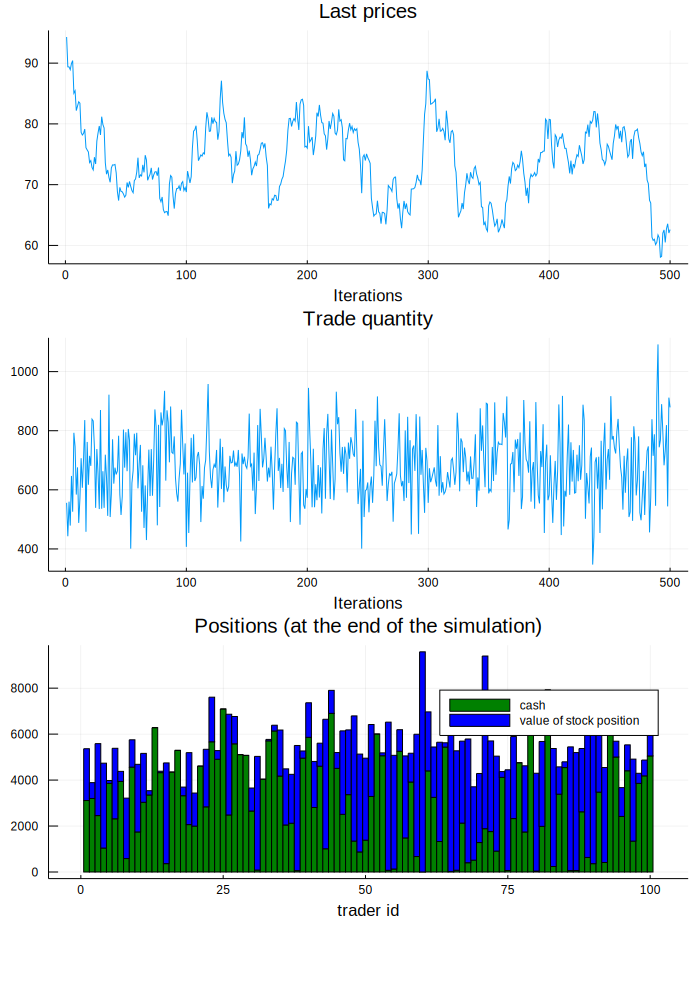

In [7]:
line_prices = plot(prices, label="", title="Last prices", xlabel="Iterations")
line_quantities = plot(quantities, label="", title="Trade quantity", xlabel="Iterations")
bar_positions = groupedbar(hcat(map(x-> x.cash, inv), map(x-> x.position * stock.last_price, inv))
    , bar_position = :stack, bar_width=1, labels=["cash", "value of stock position"], color = [:green :blue],
    title="Positions (at the end of the simulation)", xlabel="trader id")

plot(line_prices, line_quantities, bar_positions, layout = grid(3,1,heights=[0.3,0.3, 0.3]), size=[700,1000])

In [ ]:
# Derive Supply and Demand

n_iters = 300
starting_cash = 6000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for price in 1:1:200
    counter_order = SellLimitOrder("PlaceHolder", price=price, quantity=9999999999)
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)

for n in 1:n_iters
    println("Placing...")
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)
        print("Price: $(stock.last_price)")
    end
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end


In [ ]:
sell_prices = unique(map(x -> x.price, stock.sell_limit_orders))
sell_quantities = [-sum(map(x-> x.quantity, filter(x -> x.price ==price, stock.sell_limit_orders))) for price in sell_prices]

buy_prices = unique(map(x -> x.price, stock.buy_limit_orders))
buy_quantities = [sum(map(x -> x.quantity, filter(x -> x.price ==price, stock.buy_limit_orders))) for price in buy_prices]

bar(
    sell_prices, 
    sell_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:red, label="Sell", linewidth=0, xlabel="Quantity (negative for sell)", ylabel="Price")

bar!(
    buy_prices, 
    buy_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:green, label="Buy", linewidth=0)
vline!([0], color=:black, label="")
title!("Order book")

In [ ]:
n_iters = 1
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 90

prices = Array{Float64,1}()
inv = [Investor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for inv in inv
    place!(inv, stock)
end



scatter(
    map(x-> x.quantity, stock.buy_limit_orders),
    map(x-> x.price, stock.buy_limit_orders),
    label="Buy", color=:green
)
scatter!(
    map(x-> -x.quantity, stock.sell_limit_orders),
    map(x-> x.price, stock.sell_limit_orders),
    label="Sell", color=:red
)
vline!([0], color="black", label="")
ps, qs = clear!(stock)

hline!([minimum(ps)], color=:green, label="Min price")
hline!([stock.last_price], color=:blue, label="Mean price")
hline!([maximum(ps)], color=:red, label="Max price")